# Packages

In [ ]:
using Pkg

Pkg.add("Interpolations")
Pkg.add("Distributions")
Pkg.add("Expectations")
Pkg.add("Plots")
Pkg.add("StatsPlots")

using Interpolations
using Distributions
using Expectations
using Plots
using StatsPlots

# Parameters

In [ ]:
Beta = .98
Delta = 2.6 / 100 
Lambda_e = .23
Theta = 100
Z = .85
B = .55;

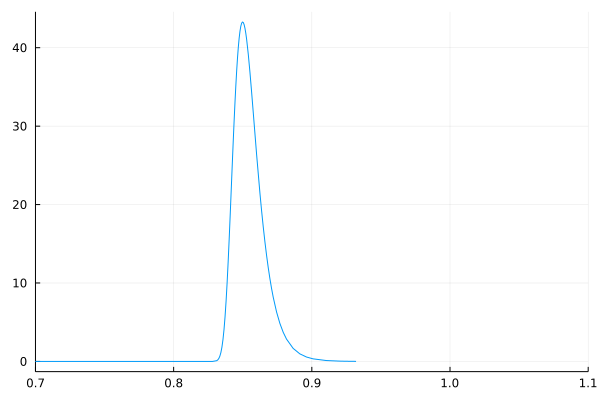

In [ ]:
N = 100
W_list = range(0.8,  1.1, length = N)

Dist = Frechet(Theta, Z)
E = expectation(Dist, QuantileRange, n = N)
plot(Dist, xlims = (0.7, 1.1), legend = false)

In [ ]:
function t(v, u, w, beta, delta, b)
    v_cal  = LinearInterpolation(w, v, extrapolation_bc = Line())
    u = b + beta * E(x -> max(v_cal.(x), u))
    v = w .+ beta .* ((1 - delta) .* v .+ delta * u)
    return v, u ;
end ;

## 1.1.1

In [ ]:
function separation(delta)
    u = 1
    v = zeros(N)

    for i in 1:2000
        v, u1 = t(v, u, W_list, Beta, delta, B)
        
        error = abs(u1 - u)
        u = u1
        if error < 1e-5
            break
        end
    end
    
    w_res = 0
    for i in 1:N
        if v[i] >= u
            w_res = W_list[i]
            break
        end
    end
    
    plot(W_list, v, xlabel = "wages", ylabel = "Values",
        label = "Value Function Value of Employed Worker (V)")

    fu(x) = u
    plot!(W_list, fu.(W_list), label = "U")

    plt = plot!(legend=:topleft)

    return v, u, w_res, plt
end

V, U, Res_w, Plt = separation(Delta);

print("U = ", U, '\n')
print("Reservation wage = ", Res_w, '\n')

U = 42.0789684946622
Reservation wage = 0.8424242424242424


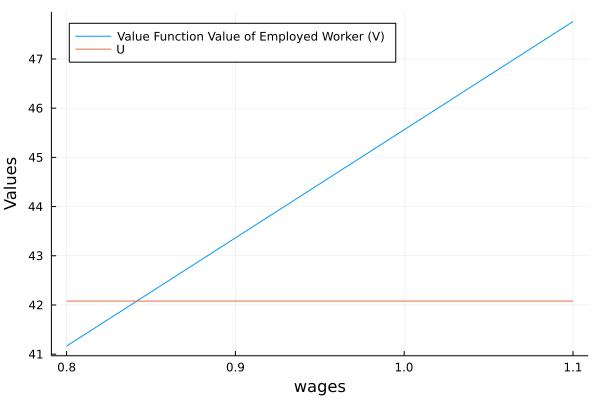

In [ ]:
Plt

## 1.1.2

In [ ]:
Agents = 1000
Periods = 500

function find_unemp_in_each_period(v, u, delta)
  vfunc = LinearInterpolation(W_list, v, extrapolation_bc = Line())

  states = zeros(Periods, Agents)

  for t in 2:Periods
    for a in 1:Agents

      offer = rand(Dist)

      if states[t - 1, a] == 0 && vfunc(offer) > u
        states[t, a] = 1
    
      elseif states[t - 1, a] == 1 && rand() > delta
        states[t, a] = 1
      end

    end
  end

  unemp_rate = 1 .- mean(states, dims = 2)

  return unemp_rate
end;

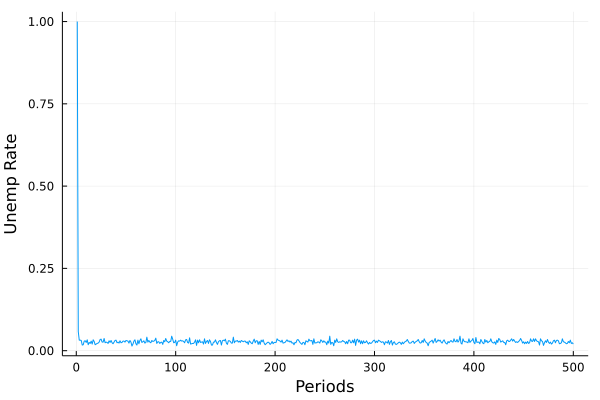

In [ ]:
Unemplyment_rate = find_unemp_in_each_period(V, U, Delta)

plot(1:Periods, Unemplyment_rate, xlabel = "Periods", ylabel = "Unemp Rate",
    legend = false)

## 1.1.3

In [ ]:
Delta_list = range(.01, .5, length = 10)

Res_w_list = []

for el in Delta_list
  V, U, Res_w, _ = separation(el);
  append!(Res_w_list, Res_w)
end;

### Reservation wage as a function of separation rate.

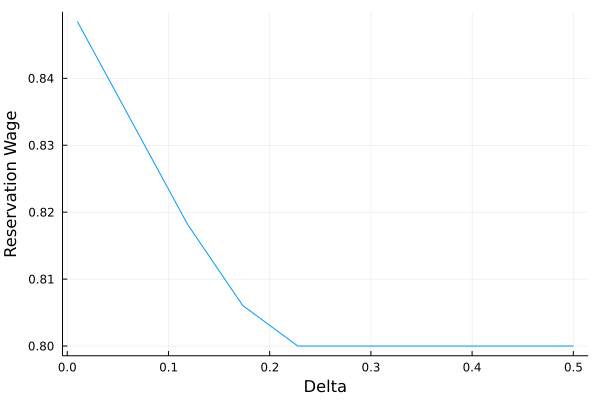

In [ ]:
plot(Delta_list, Res_w_list, legend = false, xlabel = "Delta", ylabel = "Reservation Wage")

### Unemployment across time for different values of $δ$

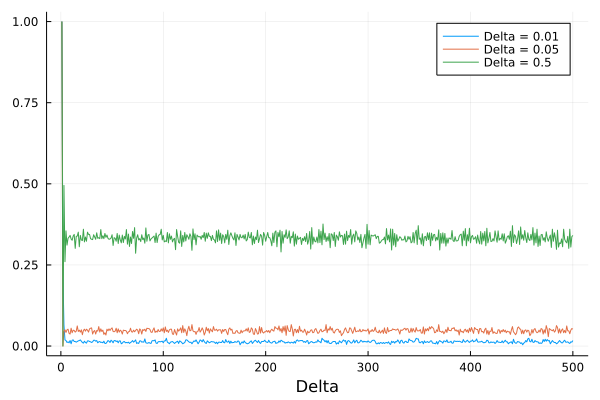

In [ ]:
Delta_list = [.01, .05, .5]

plt = plot()

for el in Delta_list
  V, U, _, _ = separation(el);
  unemp = find_unemp_in_each_period(V, U, el)
  plot!(plt, 1:Periods, unemp, label = "Delta = $el")
end;

plot!(xlabel = "Delta")
plt

#1.2

In [ ]:
Un = .07;

Delta_list = range(.05, .2, length = 100)

Mean_unemp_list = []
D_list = []

for el in Delta_list
  V, U, _, _ = separation(el);
  unemp = find_unemp_in_each_period(V, U, el)
  Mean_unemp = mean(unemp[100:Periods])
  D = (Mean_unemp - Un) ^ 2
  append!(Mean_unemp_list, Mean_unemp)
  append!(D_list, D)
end;

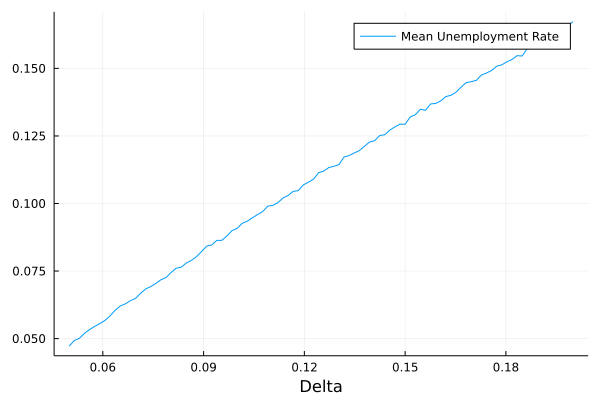

In [ ]:
plot(Delta_list, Mean_unemp_list, xlabel = "Delta", label = "Mean Unemployment Rate")

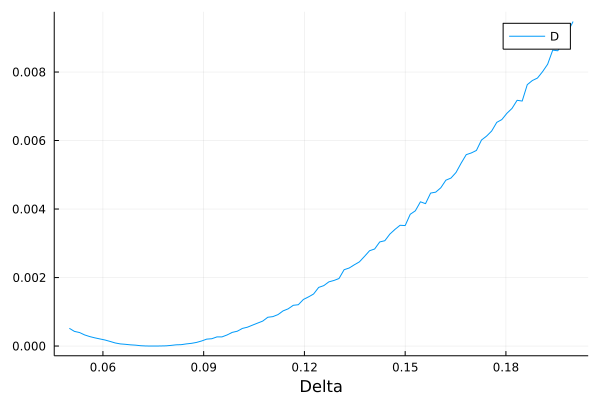

In [ ]:
plot(Delta_list, D_list, xlabel = "Delta", label = "D")

In [ ]:
D_argmin = argmin(D_list)
Delta_star = Delta_list[D_argmin]

0.07575757575757576

##$δ$ must be about .0757

#2

In [ ]:
Beta = .98
Delta = 6.5 / 100
Theta = 100
Z = .8
B = .55
Lambda_e = 10 / 100;

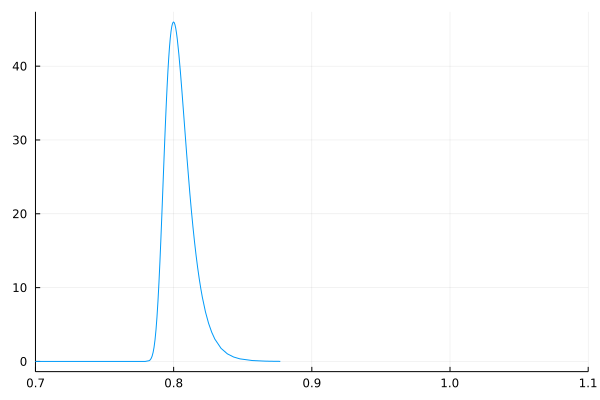

In [ ]:
N = 100
W_list = range(0.7,  1, length = N)

Dist = Frechet(Theta, Z)
E = expectation(Dist, QuantileRange, n = N)
plot(Dist, xlims = (0.7, 1.1), legend = false)

In [ ]:
function t(v, u, w, beta, delta, lambda_e, b)
    vfunc = LinearInterpolation(w, v, extrapolation_bc=Line())
    u = b + beta * E(x -> max(vfunc.(x),u))
    v = w .+ beta .* lambda_e .* E(x -> max.(vfunc.(x), vfunc.(w))) .+ beta .*
         (1 - lambda_e) .* (delta * u .+ (1 - delta) .* v)
    return v, u;
end;

## 2.1

In [ ]:
function on_the_job(lambda_e, delta, b)
    u = 1
    v = zeros(N)

    for i in 1:2000
        v, u1 = t(v, u, W_list, Beta, delta, lambda_e, b)
        
        error = abs(u1 - u)
        u = u1
        if error < 1e-5
            break
        end
    end
    
    w_res = 0
    for i in 1:N
        if v[i] >= u
            w_res = W_list[i]
            break
        end
    end
    
    plot(W_list, v, xlabel = "wages", ylabel = "Values",
        label = "Value Function Value of Employed Worker (V)")

    fu(x) = u
    plot!(W_list, fu.(W_list), label = "U")

    plt = plot!(legend=:topleft)

    return v, u, w_res, plt
end

V, U, Res_w, Plt = on_the_job(Lambda_e, Delta, B);
print("U = ", U, '\n')
print("Reservation wage = ", Res_w, '\n')

U = 39.528080041443644
Reservation wage = 0.7666666666666667


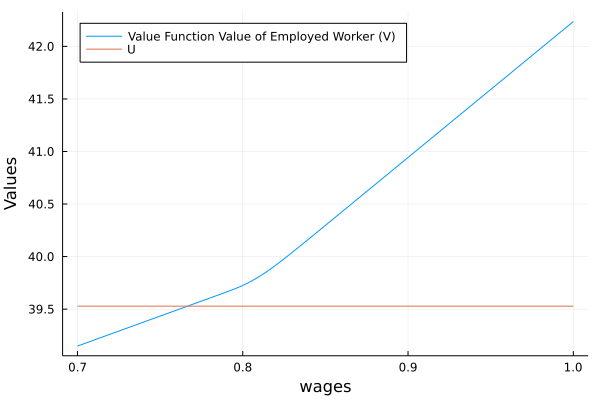

In [ ]:
Plt

## 2.2

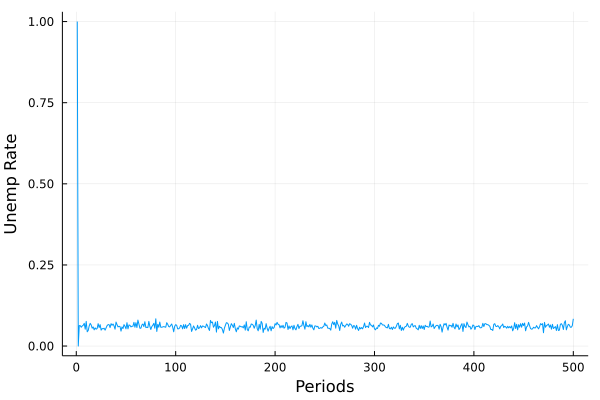

In [ ]:
Unemplyment_rate = find_unemp_in_each_period(V, U, Delta)

plot(1:Periods, Unemplyment_rate, xlabel = "Periods", ylabel = "Unemp Rate",
    legend = false)

## 2.3

In [ ]:
Lambda_e_list = range(.01, .5, length = 100)

Res_w_list = []

for el in Lambda_e_list
  _, _, Res_w, _ = on_the_job(el, Delta, B);
  append!(Res_w_list, Res_w)
end;

### Reservation wage as a function of $λ_e$.


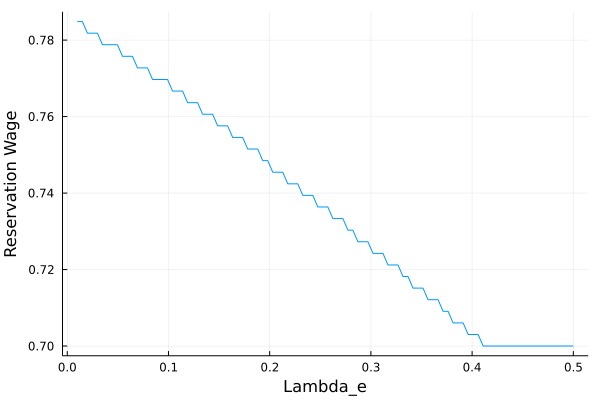

In [ ]:
plot(Lambda_e_list, Res_w_list, legend = false, xlabel = "Lambda_e", ylabel = "Reservation Wage")

In [ ]:
function find_wages_states_in_each_period(delta, lambda_e, b)
  v, u, _, _ = on_the_job(lambda_e, delta, b)

  vfunc = LinearInterpolation(W_list, v, extrapolation_bc = Line())

  states = zeros(Periods, Agents)
  wages = fill(B, (Periods, Agents))

  for t in 2:Periods
    for a in 1:Agents

      offer = rand(Dist)
      shock = rand()
      new_offer = rand()

      if states[t - 1, a] == 0 && vfunc(offer) > u
        states[t, a] = 1
        wages[t, a] = offer
    
      elseif (states[t - 1, a] == 1 && new_offer < lambda_e 
              && offer > wages[t - 1, a])
        states[t, a] = 1
        wages[t, a] = offer
      
      elseif states[t - 1, a] == 1 && shock < delta
        states[t, a] = 0
      
      elseif states[t - 1, a] == 1
        states[t, a] = 1
        wages[t, a] = wages[t - 1, a]

      end

    end
  end

  return states, wages
end;

### Unemployment across time for different values of $λ_e$

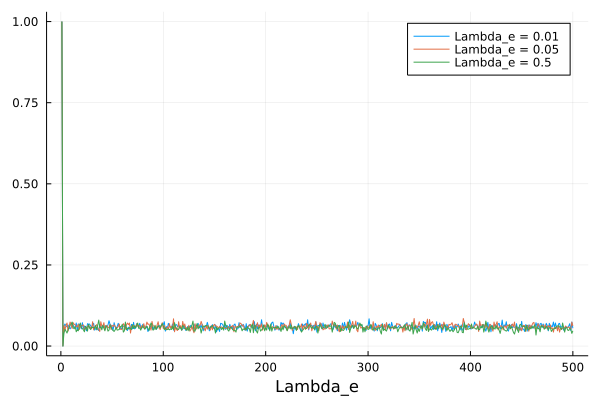

In [ ]:
Lambda_e_list = [.01, .05, .5]

plt = plot()

for el in Lambda_e_list
  states, _ = find_wages_states_in_each_period(Delta, el, B)
  unemp = 1 .- mean(states, dims = 2)
  plot!(plt, 1:Periods, unemp, label = "Lambda_e = $el")
end;

plot!(xlabel = "Lambda_e")
plt

####***Essentially $λ_e$ has no effect on the unemployment***


## 2.4

### Wage Dispersion

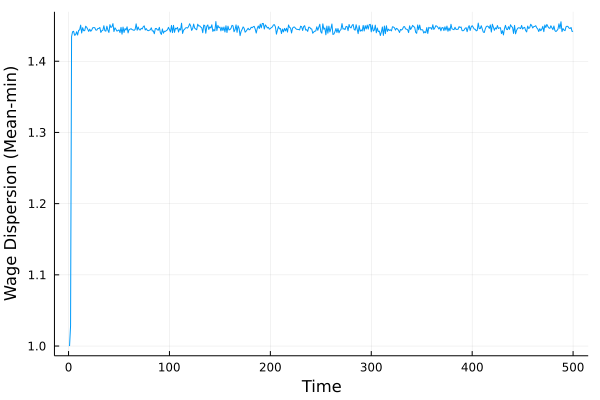

In [ ]:
_, Wages = find_wages_states_in_each_period(Delta, Lambda_e, B)
Mm = mean(Wages, dims = 2) ./ minimum(Wages, dims = 2)

plot(1:Periods, Mm, xlabel = "Time", ylabel = "Wage Dispersion (Mean-min)", 
    legend = false)

### Wage Dispersion for different values of $δ$

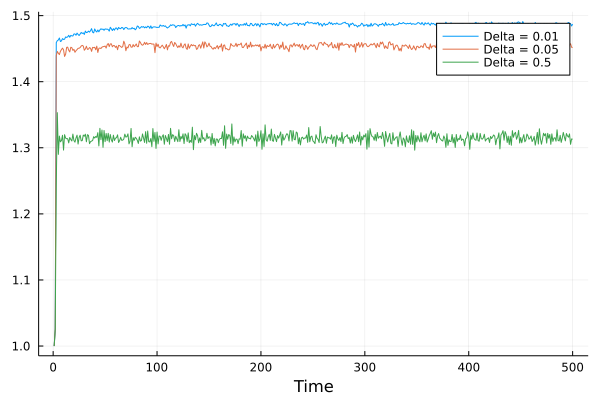

In [ ]:
Delta_list = [.01, .05, .5]

plt = plot()

for el in Delta_list
  _, Wages = find_wages_states_in_each_period(el, Lambda_e, B)
  Mm = mean(Wages, dims = 2) ./ minimum(Wages, dims = 2)
  plot!(plt, 1:Periods, Mm, label = "Delta = $el")
end;

plot!(xlabel = "Time")
plt

### Wage Dispersion for different values of $λ_e$


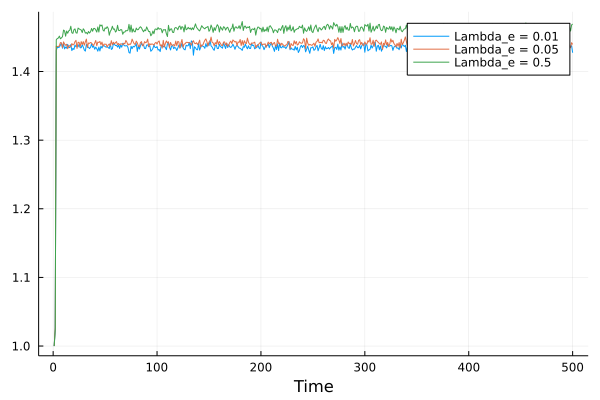

In [ ]:
Lambda_e_list = [.01, .05, .5]

plt = plot()

for el in Lambda_e_list
  _, Wages = find_wages_states_in_each_period(Delta, el, B)
  Mm = mean(Wages, dims = 2) ./ minimum(Wages, dims = 2)
  plot!(plt, 1:Periods, Mm, label = "Lambda_e = $el")
end;

plot!(xlabel = "Time")
plt

### Wage Dispersion for different values of $b$ (Unemployment Benefit)


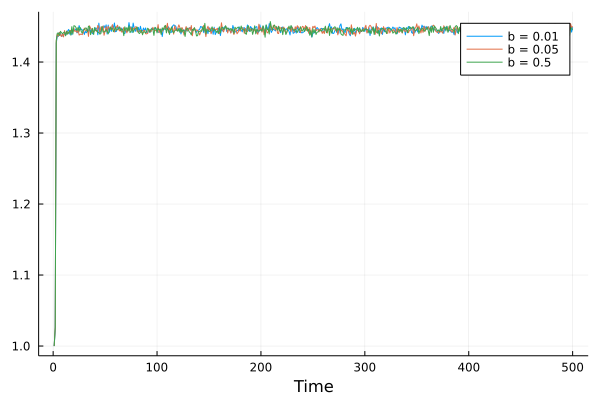

In [ ]:
B_list = [.01, .05, .5]

plt = plot()

for el in B_list
  _, Wages = find_wages_states_in_each_period(Delta, Lambda_e, el)
  Mm = mean(Wages, dims = 2) ./ minimum(Wages, dims = 2)
  plot!(plt, 1:Periods, Mm, label = "b = $el")
end;

plot!(xlabel = "Time")
plt

#### This Means $b$ has no effect on wage dispersion.

#2.2

In [ ]:
Beta = .98
Delta = 6.5 / 100
Theta = 100
Z = .8
B = .55
Un = .09;

In [ ]:
Delta_list = range(.05, .95, length = 100)

Mean_unemp_list = []
D_list = []

for el in Delta_list
  states, _ = find_wages_states_in_each_period(el, Lambda_e, B)
  unemp = 1 .- mean(states, dims = 2)
  Mean_unemp = mean(unemp)
  D = (Mean_unemp - Un) ^ 2
  append!(Mean_unemp_list, Mean_unemp)
  append!(D_list, D)
end;

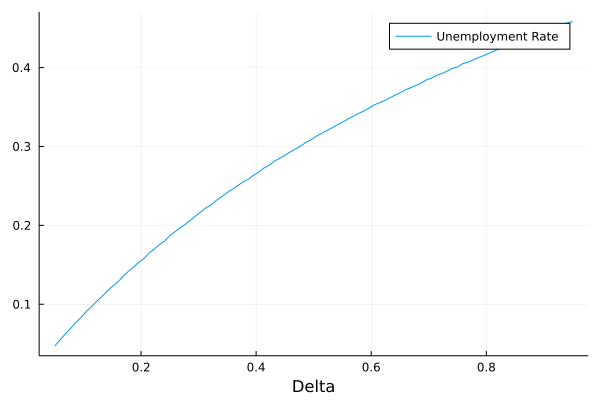

In [ ]:
plot(Delta_list, Mean_unemp_list, xlabel = "Delta", label = "Unemployment Rate")

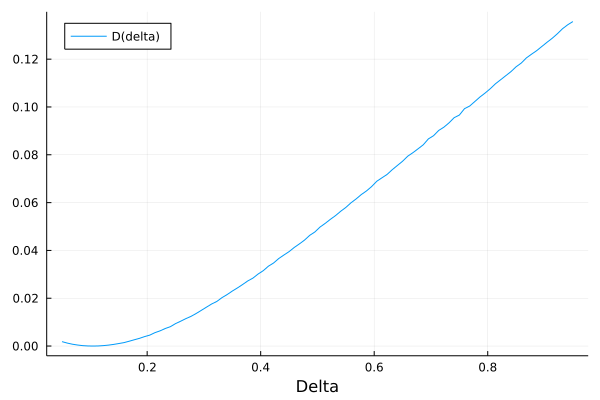

In [ ]:
plot(Delta_list, D_list, xlabel = "Delta", label = "D(delta)", legend = :topleft)

In [ ]:
D_min_i = argmin(D_list)
Delta_star = Delta_list[D_min_i]

0.10454545454545454

## Best Value of $δ$

Best value for $δ$ is about 0.104